<a href="https://colab.research.google.com/github/weerinphas/CMU/blob/main/640631127_PANDAs_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data cleansing

During the course of doing data analysis and modeling, a significant amount of time is spent on data preparation: 

*   loading
*   cleaning
*   transforming
*   rearraging

Such tasks are often reported to take up 80% or more of an analyst’s time.


What can happen with the loading data are
* missing data
* duplicate data
* string manipulation
* other analytical data transformation


##Missing data
---

Some data are imperfect, but it is functional for lot of users

For numeric data,
  Pandas use Nan ``` Nan``` (Not a Number) to represent the number

So call a *sentinel value*



In [1]:
import pandas as pd
import numpy as np

**To dectect the missing data**

---


Check by isNull value 

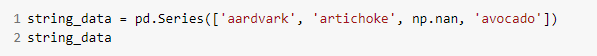


In [2]:
string_data = pd.Series(['aardvrk', 'artichoke', np.nan, 'avocado'])
string_data

0      aardvrk
1    artichoke
2          NaN
3      avocado
dtype: object

check for null value


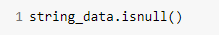

In [3]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

The N/A handling method are provided in the data frame as given


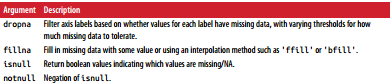


###Filtering the data
---


The *NA* data can filtering out as shown

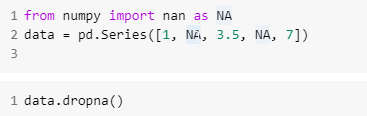

In [4]:
from numpy import nan as NA
data = pd.Series([1, NA, 3.5, NA, 7])

In [5]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

the data frame can be also filter


In [6]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, 6.5, 3.]])
data


,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


and then drop it by
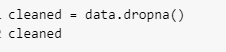

In [7]:
cleaned = data.dropna()
cleaned

,0,1,2
0,1.0,6.5,3.0


We can drop only the line which contains **NA** all the rows usign `how='all'`

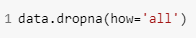

In [8]:
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


To drop only columns which contains  all NA, you can use the `axis=1 `parameter

In [9]:
data[4] = NA
data


,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


drop the column which all data is `NaN`

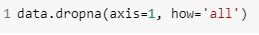

In [10]:
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


We can drop the rows which may have more data than the given value as we can tolerate for some data missing. `tresh` parameter is required here


In [11]:
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
df

,0,1,2
0,1.781406,NaN,NaN
1,0.185243,NaN,NaN
2,0.380804,NaN,-0.313321
3,0.327255,NaN,-1.347314
4,-1.380867,-0.214611,-1.033628
5,0.634904,-0.322527,2.221720
6,0.410649,-0.620958,-0.593541


If we drop all NA,using `dropna()`

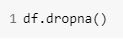

In [12]:
df.dropna()

,0,1,2
4,-1.380867,-0.214611,-1.033628
5,0.634904,-0.322527,2.221720
6,0.410649,-0.620958,-0.593541


drop only a line which contains non-NA value more than or equal than the treshold 

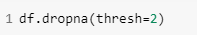

In [13]:
df.dropna(thresh=2)

,0,1,2
2,0.380804,NaN,-0.313321
3,0.327255,NaN,-1.347314
4,-1.380867,-0.214611,-1.033628
5,0.634904,-0.322527,2.221720
6,0.410649,-0.620958,-0.593541


####Work

---



Form the file given [here](https://drive.google.com/open?id=1RMTN43mA85mWgY03yZiygZuvod4Us07U)


---



แก้ไข Download from [here](https://teams.microsoft.com/l/file/BFEBCC6E-5217-45DF-B49F-E45A8467E029?tenantId=cf81f1df-de59-4c29-91da-a2dfd04aa751&fileType=csv&objectUrl=https%3A%2F%2Fo365cmu.sharepoint.com%2Fsites%2FSec_5350_2564_1_001-000%2FClass%20Materials%2FDATA%2Fproperty_data.csv&baseUrl=https%3A%2F%2Fo365cmu.sharepoint.com%2Fsites%2FSec_5350_2564_1_001-000&serviceName=teams&threadId=19:FLqSF6AJ_OXnqLRHe2Hc2recKSHpmum0kxQCiPx1ltY1@thread.tacv2&groupId=59e64ddc-01a2-43af-b076-b362dd98d444) using MSTeams class/data

**Import file**

In [14]:
url = 'https://raw.githubusercontent.com/weerinphas/CMU/main/property_data.csv'
df = pd.read_csv(url)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,PRICE
0,100001000.0,104.0,PUTNAM,Y,3,1,1000,20000.0
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850,NaN
3,100004000.0,201.0,BERKELEY,12,1,NaN,700,NaN
4,NaN,203.0,BERKELEY,Y,3,2,1600,NaN
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800,NaN
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950,NaN
7,100008000.0,213.0,TREMONT,Y,1,1,NaN,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800,NaN


Provide the given output

output 1

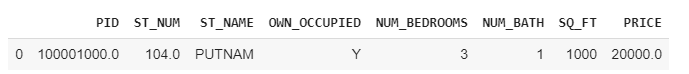

In [15]:
df.dropna()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,PRICE
0,100001000.0,104.0,PUTNAM,Y,3,1,1000,20000.0


Output 2

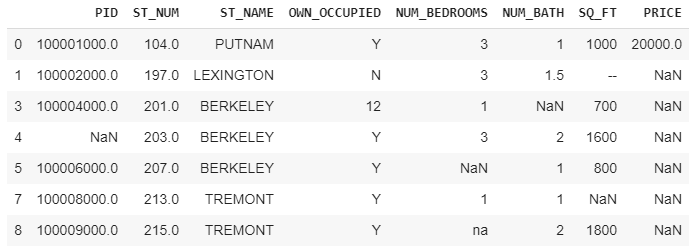

In [16]:
df.dropna(thresh=6)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,PRICE
0,100001000.0,104.0,PUTNAM,Y,3,1,1000,20000.0
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--,NaN
3,100004000.0,201.0,BERKELEY,12,1,NaN,700,NaN
4,NaN,203.0,BERKELEY,Y,3,2,1600,NaN
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800,NaN
7,100008000.0,213.0,TREMONT,Y,1,1,NaN,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800,NaN


Output 3

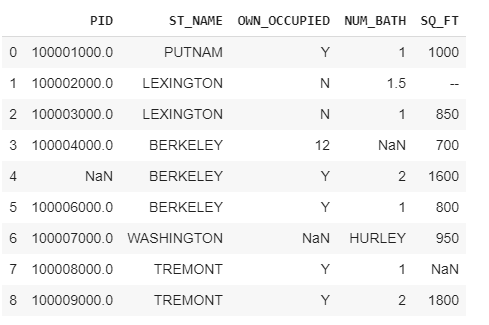

In [17]:
df.dropna(thresh=len(data) - 1, axis=1)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


###Filling in missing data
---
Instead of filtering data. Default data may be used.
we can fil the defulat data for all NA values.

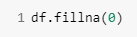


In [18]:
df.fillna(0)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,PRICE
0,100001000.0,104.0,PUTNAM,Y,3,1,1000,20000.0
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--,0.0
2,100003000.0,0.0,LEXINGTON,N,0,1,850,0.0
3,100004000.0,201.0,BERKELEY,12,1,0,700,0.0
4,0.0,203.0,BERKELEY,Y,3,2,1600,0.0
5,100006000.0,207.0,BERKELEY,Y,0,1,800,0.0
6,100007000.0,0.0,WASHINGTON,0,2,HURLEY,950,0.0
7,100008000.0,213.0,TREMONT,Y,1,1,0,0.0
8,100009000.0,215.0,TREMONT,Y,na,2,1800,0.0


Or we can define the value for each column

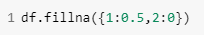

In [19]:
df.fillna({1:0.5, 2:0})

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,PRICE
0,100001000.0,104.0,PUTNAM,Y,3,1,1000,20000.0
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850,NaN
3,100004000.0,201.0,BERKELEY,12,1,NaN,700,NaN
4,NaN,203.0,BERKELEY,Y,3,2,1600,NaN
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800,NaN
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950,NaN
7,100008000.0,213.0,TREMONT,Y,1,1,NaN,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800,NaN


In [20]:
df.fillna({'PID':0.5, 'ST_NUM':0})

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,PRICE
0,100001000.0,104.0,PUTNAM,Y,3,1,1000,20000.0
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--,NaN
2,100003000.0,0.0,LEXINGTON,N,NaN,1,850,NaN
3,100004000.0,201.0,BERKELEY,12,1,NaN,700,NaN
4,0.5,203.0,BERKELEY,Y,3,2,1600,NaN
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800,NaN
6,100007000.0,0.0,WASHINGTON,NaN,2,HURLEY,950,NaN
7,100008000.0,213.0,TREMONT,Y,1,1,NaN,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800,NaN


`fillna` returns a new object, but we can modifiy the existing object in-place

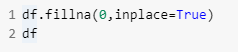


In [21]:
df.fillna(0, inplace=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,PRICE
0,100001000.0,104.0,PUTNAM,Y,3,1,1000,20000.0
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--,0.0
2,100003000.0,0.0,LEXINGTON,N,0,1,850,0.0
3,100004000.0,201.0,BERKELEY,12,1,0,700,0.0
4,0.0,203.0,BERKELEY,Y,3,2,1600,0.0
5,100006000.0,207.0,BERKELEY,Y,0,1,800,0.0
6,100007000.0,0.0,WASHINGTON,0,2,HURLEY,950,0.0
7,100008000.0,213.0,TREMONT,Y,1,1,0,0.0
8,100009000.0,215.0,TREMONT,Y,na,2,1800,0.0


We can use the interpolation method to file the value.

Now we create a new data frame with some NA


In [22]:
df = pd.DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA
df

,0,1,2
0,1.541761,0.660225,-0.433846
1,-0.444952,-0.567870,0.740602
2,-0.073460,NaN,-0.805975
3,0.088577,NaN,-1.051616
4,-1.102385,NaN,NaN
5,-0.348374,NaN,NaN


Add the interpolation methods

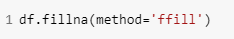

In [23]:
df.fillna(method='ffill')

,0,1,2
0,1.541761,0.660225,-0.433846
1,-0.444952,-0.567870,0.740602
2,-0.073460,-0.567870,-0.805975
3,0.088577,-0.567870,-1.051616
4,-1.102385,-0.567870,-1.051616
5,-0.348374,-0.567870,-1.051616


we can set limit of filling data that it should not be filled more than limit value.

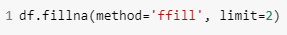



In [24]:
df.fillna(method='ffill', limit=2)

,0,1,2
0,1.541761,0.660225,-0.433846
1,-0.444952,-0.567870,0.740602
2,-0.073460,-0.567870,-0.805975
3,0.088577,-0.567870,-1.051616
4,-1.102385,NaN,-1.051616
5,-0.348374,NaN,-1.051616


Another fill method can be found in the api


> you may google it using the name of the method, and the component for example, Dataframe fillna which will link to here
[link text](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna)












####Work

---
From the propery_data you have done from the last work
Provide this dataframe fill the data to get the given output

Output 1

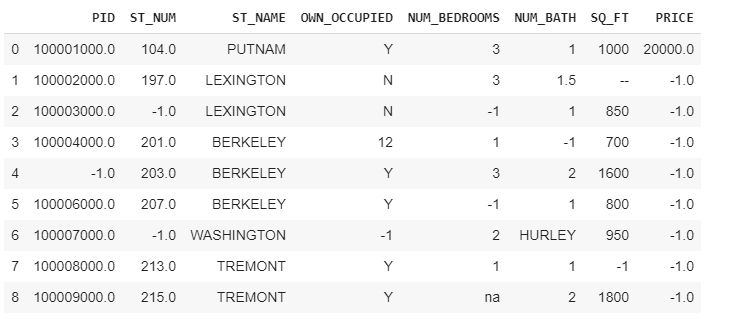

In [25]:
url = 'https://raw.githubusercontent.com/weerinphas/CMU/main/property_data.csv'
df = pd.read_csv(url)

In [26]:
df.fillna(-1, inplace=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,PRICE
0,100001000.0,104.0,PUTNAM,Y,3,1,1000,20000.0
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--,-1.0
2,100003000.0,-1.0,LEXINGTON,N,-1,1,850,-1.0
3,100004000.0,201.0,BERKELEY,12,1,-1,700,-1.0
4,-1.0,203.0,BERKELEY,Y,3,2,1600,-1.0
5,100006000.0,207.0,BERKELEY,Y,-1,1,800,-1.0
6,100007000.0,-1.0,WASHINGTON,-1,2,HURLEY,950,-1.0
7,100008000.0,213.0,TREMONT,Y,1,1,-1,-1.0
8,100009000.0,215.0,TREMONT,Y,na,2,1800,-1.0


Output 2

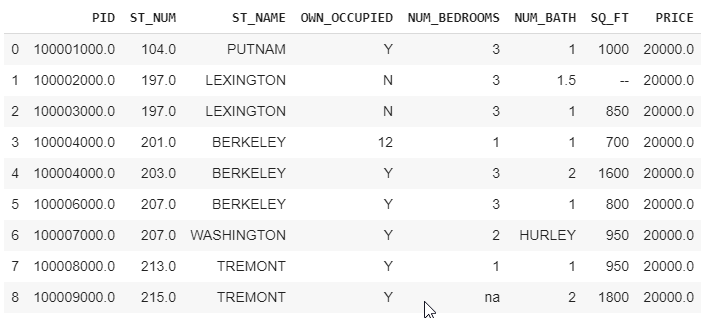

In [27]:
url = 'https://raw.githubusercontent.com/weerinphas/CMU/main/property_data.csv'
df = pd.read_csv(url)

In [28]:
df['PID'].fillna(100004000.0, inplace=True)
df['ST_NUM'].fillna(207.0, inplace=True)
df['OWN_OCCUPIED'].fillna('Y', inplace=True)
df['NUM_BEDROOMS'].fillna(3, inplace=True)
df['NUM_BATH'].fillna(1, inplace=True)
df['PRICE'].fillna(20000, inplace=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,PRICE
0,100001000.0,104.0,PUTNAM,Y,3,1,1000,20000.0
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--,20000.0
2,100003000.0,207.0,LEXINGTON,N,3,1,850,20000.0
3,100004000.0,201.0,BERKELEY,12,1,1,700,20000.0
4,100004000.0,203.0,BERKELEY,Y,3,2,1600,20000.0
5,100006000.0,207.0,BERKELEY,Y,3,1,800,20000.0
6,100007000.0,207.0,WASHINGTON,Y,2,HURLEY,950,20000.0
7,100008000.0,213.0,TREMONT,Y,1,1,NaN,20000.0
8,100009000.0,215.0,TREMONT,Y,na,2,1800,20000.0


Output 3

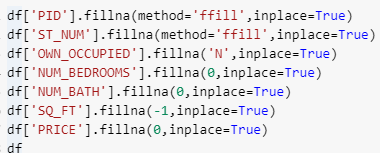

In [29]:
url = 'https://raw.githubusercontent.com/weerinphas/CMU/main/property_data.csv'
df = pd.read_csv(url)

In [30]:
df['PID'].fillna(method='ffill', inplace=True)
df['ST_NUM'].fillna(method='ffill', inplace=True)
df['OWN_OCCUPIED'].fillna('N', inplace=True)
df['NUM_BEDROOMS'].fillna(0, inplace=True)
df['NUM_BATH'].fillna(-1, inplace=True)
df['PRICE'].fillna(0, inplace=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,PRICE
0,100001000.0,104.0,PUTNAM,Y,3,1,1000,20000.0
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--,0.0
2,100003000.0,197.0,LEXINGTON,N,0,1,850,0.0
3,100004000.0,201.0,BERKELEY,12,1,-1,700,0.0
4,100004000.0,203.0,BERKELEY,Y,3,2,1600,0.0
5,100006000.0,207.0,BERKELEY,Y,0,1,800,0.0
6,100007000.0,207.0,WASHINGTON,N,2,HURLEY,950,0.0
7,100008000.0,213.0,TREMONT,Y,1,1,NaN,0.0
8,100009000.0,215.0,TREMONT,Y,na,2,1800,0.0


##Data Transformation



We need to transform the data in the format which can manipulate it later.

###Removing Duplicates
---


Some data duplication must be removed to reduce the unusal behanviour of data
from the provided data

In [31]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


The duplicated data is found by

In [32]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

So we can drop the duplicate code

In [33]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


we can select key to check the duplicate data, adding a new column to the data frame to see which data is stored


In [34]:
data['v1'] = range(7)
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


check the dupplicate key only the key in column k1

In [35]:
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


The previous work keep the first data in the result data frame. We can keep the last entry of the duplicate data using the `keep` parameter

In [36]:
data.drop_duplicates(['k1','k2'],keep='last')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


###Transforming Data Using a Function or mapping

Data can be mapped to a better representation

with the provided data frame

In [37]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                              'Pastrami', 'corned beef', 'Bacon',
                              'pastrami', 'honey ham', 'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


The mapping dictionary is provided

In [38]:
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

Then we can provided the map as given

In [39]:
lowercased = data['food'].str.lower()
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [40]:
data['animal'] = lowercased.map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


###Replacing value
---

Some value can be replaced, in order to manage the code easier.
For example with the given data frame


In [41]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

The value -999 is may be the sentinel values

The sentinal value is the value which define the state of data but not the real data. For example, the exit point or the N/A of the value.


In [42]:
data.replace(-999,np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

we can replace multiple data with only one value

In [43]:
data.replace([-999,-1000],np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

Or replace different value with different data

In [44]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [45]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

###Renaming Axis Index

The axis index which we loaded from the different sources may be hard to understand.
So we rename the index name for the better understanding

In [46]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=['Ohio', 'Colorado', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


We can use the function to change the name of each index

In [47]:
transform = lambda x: x[:4].upper()
data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

In [48]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


To change the index name we have to set the index values

In [49]:
data.index = data.index.map(transform)
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


Or if we want to rename it instancely (without seeing the new solution first)  we can use the rename method
```code```



In [50]:
data.rename(index = str.title,columns=str.upper)


,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


if we want to change the specific name, using the map for change the index name

In [51]:
data.rename(index={'OHIO':'INDIANA'},
            columns={'three':'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


To save the new name directly using `inplace` method


In [52]:
data.rename(index={'OHIO':'INDIANA'},
            inplace=True)
data

,one,two,three,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


####Work
---

From the previous work provide this output

Output1

fill PID, and PID as an index

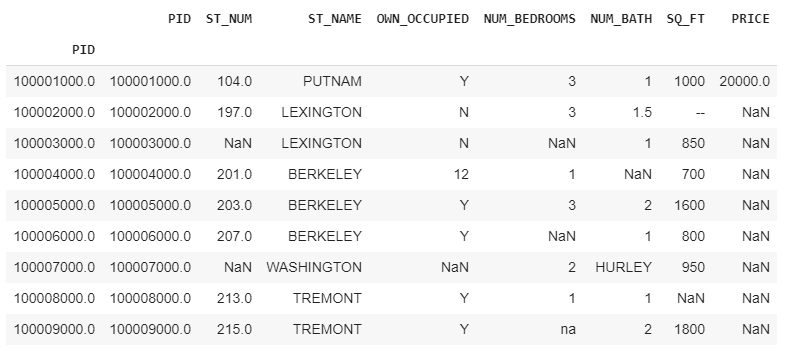

In [53]:
url = 'https://raw.githubusercontent.com/weerinphas/CMU/main/property_data.csv'
df = pd.read_csv(url)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,PRICE
0,100001000.0,104.0,PUTNAM,Y,3,1,1000,20000.0
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850,NaN
3,100004000.0,201.0,BERKELEY,12,1,NaN,700,NaN
4,NaN,203.0,BERKELEY,Y,3,2,1600,NaN
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800,NaN
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950,NaN
7,100008000.0,213.0,TREMONT,Y,1,1,NaN,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800,NaN


In [54]:
# fill PID
df['PID'].fillna(100005000, inplace=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,PRICE
0,100001000.0,104.0,PUTNAM,Y,3,1,1000,20000.0
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850,NaN
3,100004000.0,201.0,BERKELEY,12,1,NaN,700,NaN
4,100005000.0,203.0,BERKELEY,Y,3,2,1600,NaN
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800,NaN
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950,NaN
7,100008000.0,213.0,TREMONT,Y,1,1,NaN,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800,NaN


In [55]:
# set PID as an index
df.set_index('PID', drop=False)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,PRICE
PID,,,,,,,,
100001000.0,100001000.0,104.0,PUTNAM,Y,3,1,1000,20000.0
100002000.0,100002000.0,197.0,LEXINGTON,N,3,1.5,--,NaN
100003000.0,100003000.0,NaN,LEXINGTON,N,NaN,1,850,NaN
100004000.0,100004000.0,201.0,BERKELEY,12,1,NaN,700,NaN
100005000.0,100005000.0,203.0,BERKELEY,Y,3,2,1600,NaN
100006000.0,100006000.0,207.0,BERKELEY,Y,NaN,1,800,NaN
100007000.0,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950,NaN
100008000.0,100008000.0,213.0,TREMONT,Y,1,1,NaN,NaN
100009000.0,100009000.0,215.0,TREMONT,Y,na,2,1800,NaN


###Discretization and Binding
---

Extract data and put it in the bins for analysis


In [56]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

Then we create a bin

In [57]:
bins = [18, 25, 35, 60, 100]

Then we cut the data in to a bin, the cuts represent the bins for each data

In [58]:
cuts = pd.cut(ages,bins)
cuts

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

Instead of using the texts we can see the code (index) of each bins

In [59]:
cuts.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

and the catagories, and the amount of value in each cuts can be shown

In [60]:
cuts.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')

In [61]:
pd.value_counts(cuts)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

We can set the name of each cuts by passing the arrays of labels

In [62]:
group_names = ['Youth', 'YoungAdult','MiddleAged','Senior']
pd.cut(ages,bins,labels=group_names)

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

If we pass the integer number instead of the bin edge, it will compute the equal-length bins based on the minimum and maximum values.

In [63]:
data = np.random.rand(20)

pd.cut(data,4,precision=2)

[(0.75, 0.99], (0.28, 0.52], (0.75, 0.99], (0.75, 0.99], (0.75, 0.99], ..., (0.52, 0.75], (0.28, 0.52], (0.04, 0.28], (0.28, 0.52], (0.04, 0.28]]
Length: 20
Categories (4, interval[float64]): [(0.04, 0.28] < (0.28, 0.52] < (0.52, 0.75] < (0.75, 0.99]]

###Detecting and Filtering Outliers
---


finding the outlining data and filter it out as it may be the error while gathering the data.
Let's start by having the given data

In [64]:
data = pd.DataFrame(np.random.randn(1000,4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.009401,0.028718,-0.038313,-0.004986
std,1.009733,1.000156,0.986652,0.977289
min,-3.590282,-2.974958,-2.978472,-3.185350
25%,-0.662636,-0.630152,-0.694757,-0.666895
50%,-0.027642,0.073970,-0.027608,-0.011164
75%,0.671733,0.732283,0.656343,0.634954
max,3.446746,3.442520,3.401395,3.101313


if we want to find the values in column 2 which the absolute value is exceed 3

In [65]:
col = data[2]
col[np.abs(col) >3]

797    3.401395
Name: 2, dtype: float64

If we want to get rows which value is exceeding  3, we can use `any` methods

In [66]:
a = data[(np.abs(data)>3).any(1)]
a

,0,1,2,3
69,3.446746,-0.390773,-0.577318,-1.155504
341,3.019485,2.206017,0.617836,-1.653174
353,-1.205221,-1.028914,0.748239,-3.185350
465,-1.464013,1.168478,-1.031004,3.101313
571,0.722323,3.442520,0.834088,-1.143355
797,1.713893,1.561961,3.401395,-0.157308
836,3.009059,0.325532,0.087863,-1.191421
936,-3.590282,-0.168490,-0.128147,0.237622
944,-3.070670,1.033326,0.208704,-1.271241


####Work
---

From the given file.
Categorize the size of the house as the small house (size is less than 800 sq,ft.),  the medium house (size is between 801-1200 sq.ft) and the large house ( size is more than 1200 sq.ft)

Show the number of each house size

You should ignore the value which is not the number value

In [67]:
url = 'https://raw.githubusercontent.com/weerinphas/CMU/main/property_data.csv'
df = pd.read_csv(url)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,PRICE
0,100001000.0,104.0,PUTNAM,Y,3,1,1000,20000.0
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850,NaN
3,100004000.0,201.0,BERKELEY,12,1,NaN,700,NaN
4,NaN,203.0,BERKELEY,Y,3,2,1600,NaN
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800,NaN
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950,NaN
7,100008000.0,213.0,TREMONT,Y,1,1,NaN,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800,NaN


In [68]:
df = df.replace('--',np.nan)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,PRICE
0,100001000.0,104.0,PUTNAM,Y,3,1,1000,20000.0
1,100002000.0,197.0,LEXINGTON,N,3,1.5,NaN,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850,NaN
3,100004000.0,201.0,BERKELEY,12,1,NaN,700,NaN
4,NaN,203.0,BERKELEY,Y,3,2,1600,NaN
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800,NaN
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950,NaN
7,100008000.0,213.0,TREMONT,Y,1,1,NaN,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800,NaN


In [69]:
df = df[df['SQ_FT'].notna()]
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,PRICE
0,100001000.0,104.0,PUTNAM,Y,3,1,1000,20000.0
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850,NaN
3,100004000.0,201.0,BERKELEY,12,1,NaN,700,NaN
4,NaN,203.0,BERKELEY,Y,3,2,1600,NaN
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800,NaN
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800,NaN


In [70]:
df_size = df['SQ_FT'].to_numpy().astype(int)
bin = [0, 800, 1200, max(df_size)]
group_names = ['small house', 'medium house','large house']
df_cut = pd.cut(df_size,bin,labels=group_names)
pd.value_counts(df_cut)

medium house    3
large house     2
small house     2
dtype: int64

# Data Wrangling: Join, Combine, Reshape

##Hierachical Indexing
---


Allow index to have mulitple index levels on an axis
 
Use when working with higher dimensional data ina lower dimensional form

๊Use this setup configuration

In [71]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [72]:
data = pd.Series(np.random.randn(9),
                 index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                        [1, 2, 3, 1, 3, 1, 2, 2, 3]])
data

a  1   -0.204708
   2    0.478943
   3   -0.519439
b  1   -0.555730
   3    1.965781
c  1    1.393406
   2    0.092908
d  2    0.281746
   3    0.769023
dtype: float64

In [73]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

we can see data in the multi level index

In [74]:
data['b']

1   -0.555730
3    1.965781
dtype: float64

In [75]:
data['b':'c']

b  1   -0.555730
   3    1.965781
c  1    1.393406
   2    0.092908
dtype: float64

In [76]:
data.loc[['b','d']]

b  1   -0.555730
   3    1.965781
d  2    0.281746
   3    0.769023
dtype: float64

We can see data from the inder level

In [77]:
data.loc[:,2]

a    0.478943
c    0.092908
d    0.281746
dtype: float64

Hierachical indexing play important role in reshaping data and group-based oepration.

The Hierachical index can be rearragen as the DataFrame using `unstack` methods

In [78]:
data.unstack()

,1,2,3
a,-0.204708,0.478943,-0.519439
b,-0.555730,NaN,1.965781
c,1.393406,0.092908,NaN
d,NaN,0.281746,0.769023


and the inverse version is `stack`


In [79]:
data.unstack().stack()

a  1   -0.204708
   2    0.478943
   3   -0.519439
b  1   -0.555730
   3    1.965781
c  1    1.393406
   2    0.092908
d  2    0.281746
   3    0.769023
dtype: float64

As the data frame, exiter axis can have hierachical index


In [80]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'],
                              ['Green', 'Red', 'Green']])
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

The Hierachy level can have names.  

In [81]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

###Work create this data frame

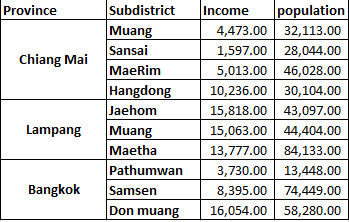


In [82]:
Income = [4473.00, 1597.00, 5013.00, 10236.00, 15818.00, 15063.00, 13777.00, 3730.00, 8395.00, 16054.00]
Populations = [32113.00, 28044.00, 46028.00, 30104.00, 43097.00, 44404.00, 84133.00, 13448.00, 74449.00, 58280.00]
d_frame = pd.DataFrame(df,
                     index=[['Chiang Mai', 'Chiang Mai', 'Chiang Mai', 'Chiang Mai',
                             'Lampang', 'Lampang', 'Lampang',
                             'Bangkok', 'Bangkok', 'Bangkok'], 
                            ['Muang', 'Sansai', 'MaeRim', 'Hangdong',
                              'Jaehom', 'Muang', 'Maetha',
                              'Pathumwan', 'Samsen', 'Don muang']],
                     columns=[['Income', 'Populations']])
d_frame.index.names = ['Province', 'Subdistrict']
d_frame[['Income']] = Income
d_frame[['Populations']] = Populations
d_frame

Income Populations
Province   Subdistrict                     
Chiang Mai Muang         4473.0     32113.0
           Sansai        1597.0     28044.0
           MaeRim        5013.0     46028.0
           Hangdong     10236.0     30104.0
Lampang    Jaehom       15818.0     43097.0
           Muang        15063.0     44404.0
           Maetha       13777.0     84133.0
Bangkok    Pathumwan     3730.0     13448.0
           Samsen        8395.0     74449.0
           Don muang    16054.0     58280.0

## Reordering and Sorting Levels
---

To transform data, we may have to swap the level of the data frame

In [83]:
frame.swaplevel('key1','key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

The index is not sort, so the multi hierachy is not set. we can sort the index at any level to set the better visualization

In [84]:
frame.sort_index(level=1)

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

So swap the key and sort will make the hieracy better

In [85]:
frame.swaplevel(0,1).sort_index(level=0)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

##Summary Statistics by Level
---

The statistic data can be calculated with the specific level
For example, if we want to calculated on the rows data

In [86]:
frame.sum(level='key2')

state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

Or caluclate on the columnwise

In [87]:
frame.sum(level='color',axis=1)

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

##Indexing with DataFrame's Column

---

some time we want to use the row index as the columns

In [88]:
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
                      'c': ['one', 'one', 'one', 'two', 'two',
                            'two', 'two'],
                      'd': [0, 1, 2, 0, 1, 2, 3]})
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


We can create a new data farme using some columns as index

In [89]:
frame2 = frame.set_index(['c','d'])
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

By default, the column is removed from the source data frame. However, if we do not want to remove the column, the `drop` parameter is passed

In [90]:
frame.set_index(['c','d'],drop = False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

###Work
---


From the given [car_details.xlsx](https://drive.google.com/open?id=1-7Q2mYi6LJNTWClJo4y0_vPB4YAuJeWn)

provided the hierachy data frame which carbrand, carmodel, and the model_name TH is a key

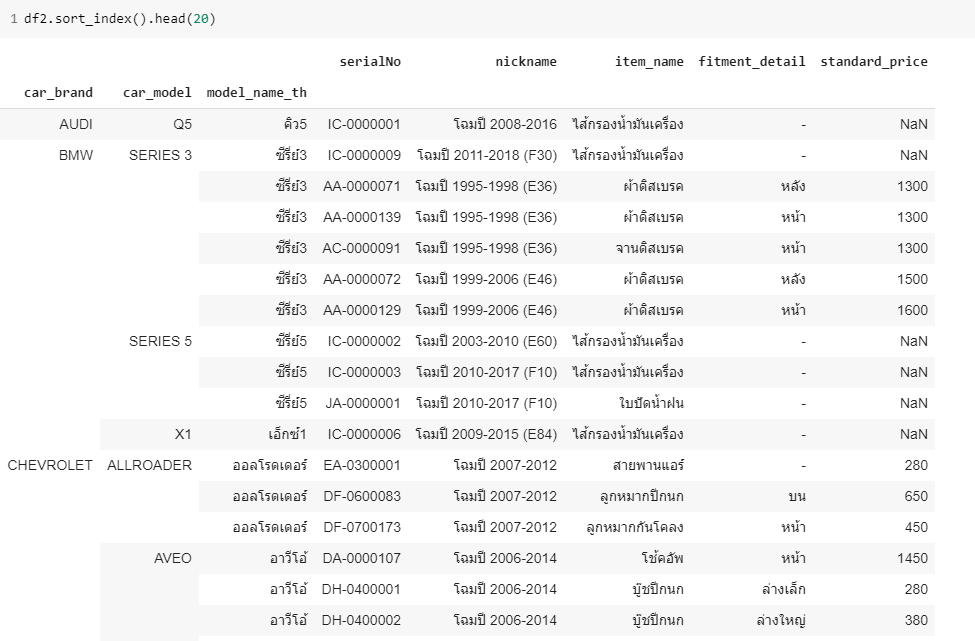

And then calculate the average price of each car brand

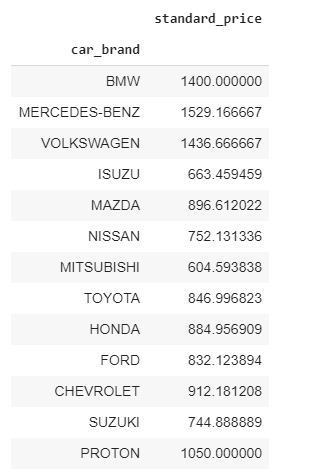

In [91]:
# import file
from google.colab import drive 
drive.mount('/content/gdrive')

import pandas as pd 
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/car_details.csv', header=1, encoding="TIS-620")
df

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,serialNo,car_brand,car_model,model_name_th,nickname,item_name,fitment_detail,standard_price,Unnamed: 8
0,IC-0000001,AUDI,Q5,คิว5,โฉมปี 2008-2016,ไส้กรองน้ำมันเครื่อง,-,NaN,NaN
1,IC-0000002,BMW,SERIES 5,ซีรี่ย์5,โฉมปี 2003-2010 (E60),ไส้กรองน้ำมันเครื่อง,-,NaN,NaN
2,IC-0000003,BMW,SERIES 5,ซีรี่ย์5,โฉมปี 2010-2017 (F10),ไส้กรองน้ำมันเครื่อง,-,NaN,NaN
3,JA-0000001,BMW,SERIES 5,ซีรี่ย์5,โฉมปี 2010-2017 (F10),ใบปัดน้ำฝน,-,NaN,NaN
4,IC-0000009,BMW,SERIES 3,ซีรี่ย์3,โฉมปี 2011-2018 (F30),ไส้กรองน้ำมันเครื่อง,-,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4724,NaN,TOYOTA,HILUX VIGO,ไฮลักซ์ วีโก้,โฉมปี 2003-2016 (Vigo 2WD),โช้คอัพ,หน้า,"1,250",NaN
4725,NaN,TOYOTA,HILUX VIGO,ไฮลักซ์ วีโก้,โฉมปี 2003-2016 (Vigo 2WD),โช้คอัพ,หน้า,"1,250",NaN
4726,NaN,TOYOTA,COROLLA ALTIS,โคโรล่า อัลติส,โฉมปี 2008-2012 (ZZE141),โช้คอัพ,หลัง,"1,440",NaN
4727,NaN,TOYOTA,HILUX REVO,ไฮลักซ์ รีโว่,โฉมปี 2016-2018 (Revo 4WD และ Pre-Runner ยกสูง),โช้คอัพ,หน้า,"1,580",NaN


In [92]:
# select column
df = df[['car_brand', 'car_model', 'model_name_th', 'serialNo', 'nickname', 'item_name', 'fitment_detail', 'standard_price']]

# set car_brand	car_model	and model_name_th a indexs
df2 = df.set_index(['car_brand','car_model', 'model_name_th'])

# show the the first 20 rows of data frame
df2.sort_index().head(20)

serialNo  ... standard_price
car_brand car_model model_name_th              ...               
AUDI      Q5        คิว5           IC-0000001  ...            NaN
BMW       SERIES 3  ซีรี่ย์3       IC-0000009  ...            NaN
                    ซีรี่ย์3       AA-0000071  ...       1,300.00
                    ซีรี่ย์3       AA-0000139  ...       1,300.00
                    ซีรี่ย์3       AC-0000091  ...       1,300.00
                    ซีรี่ย์3       AA-0000072  ...       1,500.00
                    ซีรี่ย์3       AA-0000129  ...       1,600.00
          SERIES 5  ซีรี่ย์5       IC-0000002  ...            NaN
                    ซีรี่ย์5       IC-0000003  ...            NaN
                    ซีรี่ย์5       JA-0000001  ...            NaN
          X1        เอ็กซ์1        IC-0000006  ...            NaN
CHEVROLET ALLROADER ออลโรดเดอร์    EA-0300001  ...         280.00
                    ออลโรดเดอร์    DF-0600083  ...         650.00
                    ออลโรดเดอร์    DF-0700173  ...         450.00
          AVEO      อาวีโอ้        DA-0000107  ...       1,450.00
                    อาวีโอ้        DH-0400001  ...         280.00
                    อาวีโอ้        DH-0400002  ...         380.00
                    อาวีโอ้        AA-0000042  ...       1,100.00
                    อาวีโอ้        Z-00300041  ...         280.00
                    อาวีโอ้        Z-00300036  ...         280.00

[20 rows x 5 columns]

In [93]:
# cleansing the data by droping the row which standard_price is NaN
df3 = df[df['standard_price'].notna()]
df3

,car_brand,car_model,model_name_th,serialNo,nickname,item_name,fitment_detail,standard_price
5,BMW,SERIES 3,ซีรี่ย์3,AA-0000071,โฉมปี 1995-1998 (E36),ผ้าดิสเบรค,หลัง,"1,300.00"
6,BMW,SERIES 3,ซีรี่ย์3,AA-0000139,โฉมปี 1995-1998 (E36),ผ้าดิสเบรค,หน้า,"1,300.00"
8,BMW,SERIES 3,ซีรี่ย์3,AC-0000091,โฉมปี 1995-1998 (E36),จานดิสเบรค,หน้า,"1,300.00"
9,BMW,SERIES 3,ซีรี่ย์3,AA-0000072,โฉมปี 1999-2006 (E46),ผ้าดิสเบรค,หลัง,"1,500.00"
10,BMW,SERIES 3,ซีรี่ย์3,AA-0000129,โฉมปี 1999-2006 (E46),ผ้าดิสเบรค,หน้า,"1,600.00"
...,...,...,...,...,...,...,...,...
4724,TOYOTA,HILUX VIGO,ไฮลักซ์ วีโก้,NaN,โฉมปี 2003-2016 (Vigo 2WD),โช้คอัพ,หน้า,"1,250"
4725,TOYOTA,HILUX VIGO,ไฮลักซ์ วีโก้,NaN,โฉมปี 2003-2016 (Vigo 2WD),โช้คอัพ,หน้า,"1,250"
4726,TOYOTA,COROLLA ALTIS,โคโรล่า อัลติส,NaN,โฉมปี 2008-2012 (ZZE141),โช้คอัพ,หลัง,"1,440"
4727,TOYOTA,HILUX REVO,ไฮลักซ์ รีโว่,NaN,โฉมปี 2016-2018 (Revo 4WD และ Pre-Runner ยกสูง),โช้คอัพ,หน้า,"1,580"


In [94]:
# convert standard_price to numeric
df3['standard_price'] = df3['standard_price'].str.replace(',', '').astype(float)
df3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,car_brand,car_model,model_name_th,serialNo,nickname,item_name,fitment_detail,standard_price
5,BMW,SERIES 3,ซีรี่ย์3,AA-0000071,โฉมปี 1995-1998 (E36),ผ้าดิสเบรค,หลัง,1300.0
6,BMW,SERIES 3,ซีรี่ย์3,AA-0000139,โฉมปี 1995-1998 (E36),ผ้าดิสเบรค,หน้า,1300.0
8,BMW,SERIES 3,ซีรี่ย์3,AC-0000091,โฉมปี 1995-1998 (E36),จานดิสเบรค,หน้า,1300.0
9,BMW,SERIES 3,ซีรี่ย์3,AA-0000072,โฉมปี 1999-2006 (E46),ผ้าดิสเบรค,หลัง,1500.0
10,BMW,SERIES 3,ซีรี่ย์3,AA-0000129,โฉมปี 1999-2006 (E46),ผ้าดิสเบรค,หน้า,1600.0
...,...,...,...,...,...,...,...,...
4724,TOYOTA,HILUX VIGO,ไฮลักซ์ วีโก้,NaN,โฉมปี 2003-2016 (Vigo 2WD),โช้คอัพ,หน้า,1250.0
4725,TOYOTA,HILUX VIGO,ไฮลักซ์ วีโก้,NaN,โฉมปี 2003-2016 (Vigo 2WD),โช้คอัพ,หน้า,1250.0
4726,TOYOTA,COROLLA ALTIS,โคโรล่า อัลติส,NaN,โฉมปี 2008-2012 (ZZE141),โช้คอัพ,หลัง,1440.0
4727,TOYOTA,HILUX REVO,ไฮลักซ์ รีโว่,NaN,โฉมปี 2016-2018 (Revo 4WD และ Pre-Runner ยกสูง),โช้คอัพ,หน้า,1580.0


In [95]:
# set car_brand	as index for grouping then calculate standard_price of each brands
df3 = df3.set_index('car_brand')
df3.groupby(df3.index)[['standard_price']].mean()

,standard_price
car_brand,
BMW,1400.000000
CHEVROLET,912.181208
FORD,832.123894
HONDA,884.956909
HYUNDAI,661.538462
ISUZU,663.459459
LEXUS,783.333333
MAZDA,896.612022
MERCEDES-BENZ,1529.166667
